# Get Premise-district-states Metadata

In [4]:
import numpy as np
import pandas as pd

In [109]:
URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.parquet'
df_premise_code = pd.read_parquet(URL_DATA)
if 'date' in df_premise_code.columns: df_premise_code['date'] = pd.to_datetime(df_premise_code['date'])
df_premise_code.head(10)

,premise_code,premise,address,premise_type,state,district
0,-1.0,None,",",None,None,None
1,2.0,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
2,3.0,JUSCO AYER KEROH,"LOT 4991,MUKIM BUKIT BARU,75450 LEBUH AYER KER...",Pasar Raya / Supermarket,Melaka,Melaka Tengah
3,6.0,KEDAI RUNCIT TAFAZ MAJU PRESINT 9,"NO.5, JALAN P9B/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
4,7.0,KEDAI RUNCIT SYAZ MAJU PRESINT 9,"NO.5, JALAN P9E/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
5,8.0,PASAR MINI D'MART PRESINT 8,"BLOK A T00/U01,JALAN P8/D,PRESINT 8, 62000 PUT...",Pasar Mini,W.P. Putrajaya,Wp Putrajaya
6,15.0,PASAR MINI KARIM,"NO, 7A,KAWASAN PASAR UTAN AJI,01000 KANGAR, PE...",Kedai Runcit,Perlis,Kangar
7,16.0,PASARAYA K-CERIA (KANGAR) SDN. BHD,"NO 3, 5, 7 & 9,JALAN KANGAR - ALOR SETAR SERIA...",Pasar Raya / Supermarket,Perlis,Kangar
8,115.0,TAMPIN SHOPPING CENTRE,"NO 111,JALAN BESAR,73000 TAMPIN, NEGERI SEMBILAN.",Pasar Raya / Supermarket,Negeri Sembilan,Tampin
9,136.0,THE STORE ( PUDU PLAZA ),"UG & 1st FLOOR, PUDU PLAZA,JALAN DAVIS,",Pasar Raya / Supermarket,W.P. Kuala Lumpur,Cheras


List of premise type

In [131]:
list_premise_type = df_premise_code["premise_type"].unique()
print(f'There are {len(list_premise_type)} number of premise type')
list_premise_type = list_premise_type[1:] #Slice to remove None
print(list_premise_type)

list_premise_type_df = pd.DataFrame(list_premise_type,columns=['premise_type'])

list_premise_type_df.to_csv('list_premise_type.csv')



There are 13 number of premise type
['Pasar Basah ' 'Pasar Raya / Supermarket' 'Kedai Runcit' 'Pasar Mini'
 'Restoran India Muslim' 'Restoran Cina' 'Hypermarket' 'Restoran Melayu'
 'Medan Selera' 'Foodcourt' 'Borong' 'Kedai Serbaneka']


List of premise. No need address?

In [132]:
list_premise = df_premise_code["premise"].unique()
print(f'There are {len(list_premise)} number of premise')
list_premise = list_premise[1:] #Slice to remove None
print(list_premise)

list_premise_df = pd.DataFrame(list_premise,columns=['premise'])

list_premise_df.to_csv('list_premise.csv')


There are 2696 number of premise
['PASAR BESAR IPOH' 'JUSCO AYER KEROH' 'KEDAI RUNCIT TAFAZ MAJU PRESINT 9'
 ... 'AZHAR & FAMILY FRESHMART' 'PASARAYA MINI ECONSAVE' 'XR MART BANDAR']


List of districts and states

In [186]:
list_districts = df_premise_code["district"].unique()
list_states = df_premise_code["state"].unique()

print(f'There are {len(list_districts)} districts')
print(f'There are {len(list_states)} states')
list_districts = list_districts[1:] #Slice to remove None

list_states = list_states[1:] #Slice to remove None


list_districts_states = []
counter =1
for d in list_districts:

    states = df_premise_code[df_premise_code['district']==d]
    get_state = states['state'].unique() #get_state is a nd array. access 1st index by get_state[0]

    list_districts_states.append([d,get_state[0]])

    counter+=1


#print(list_districts_states)

list_districts_states_df = pd.DataFrame(list_districts_states,columns=['district','state'])

list_districts_states_df.to_csv('list_districts_states.csv',index=False)
 
#list_states_district = list_districts_states_df.sort_values('state').to_csv('list_states_district.csv',index=False)
list_districts_states_df.sort_values('state').to_csv('list_states_district.csv',index=False)



There are 174 districts
There are 17 states


In [187]:
print(list_states)

['Perak' 'Melaka' 'W.P. Putrajaya' 'Perlis' 'Negeri Sembilan'
 'W.P. Kuala Lumpur' 'Selangor' 'Sabah' 'W.P. Labuan' 'Kelantan' 'Kedah'
 'Sarawak' 'Johor' 'Pahang' 'Pulau Pinang' 'Terengganu']


# Get item Metadata

List of item code, unit and description-use all data 

In [110]:
URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.parquet'
df_item_code = pd.read_parquet(URL_DATA)
if 'date' in df_item_code.columns: df_item_code['date'] = pd.to_datetime(df_item_code['date'])
df_item_code.head()

,item_code,item,unit,item_group,item_category
0,-1,None,None,None,None
1,1,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
2,2,AYAM BERSIH - SUPER,1kg,BARANGAN SEGAR,AYAM
3,3,AYAM HIDUP,1kg,BARANGAN SEGAR,AYAM
4,9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING


In [116]:
#df_item_code.to_csv('list_item.csv',index=False)
df_item_code.tail(-1).to_csv('list_item.csv',index=False)

# Merge metadata with month X data

In [117]:
import numpy as np
import pandas as pd

#!pip install pandas fastparquet

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/pricecatcher_2023-06.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
df.head()


,date,premise_code,item_code,price
0,2023-06-01,2,1,9.4
1,2023-06-01,2,9,36.0
2,2023-06-01,2,16,4.8
3,2023-06-01,2,18,5.5
4,2023-06-01,2,19,5.5


Mapping df_premise_code and df_item_code to df

In [142]:
def merge_data(df):

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning

    print(tempdf.head())
    #
    p =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise_type"])
    p.name = 'premise_type'


    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    q =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise"])
    q.name = 'premise'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    s =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["state"])
    s.name = 'state'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    t = tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')['district'])
    t.name = "district"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    u = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item'])
    u.name = "item"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    v = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['unit'])
    v.name = "unit"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_category'])
    w.name = "item_category"

    #print('S:\n',s) 
    #print('T:\n',t)

    df_master = pd.concat([df,p,q,s,t,u,v,w],axis=1)
    return df_master    
    
df_master = merge_data(df)    
#df_master.sample(frac=1)
df_master.head()

        date  premise_code  item_code  price
0 2023-06-01             2          1    9.4
1 2023-06-01             2          9   36.0
2 2023-06-01             2         16    4.8
3 2023-06-01             2         18    5.5
4 2023-06-01             2         19    5.5


,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category
0,2023-06-01,2,1,9.4,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM
1,2023-06-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING
2,2023-06-01,2,16,4.8,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN
3,2023-06-01,2,18,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN
4,2023-06-01,2,19,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG EMAS,1kg,BUAH-BUAHAN


Check sanity-seems ok,tally

In [140]:
df_premise_code[df_premise_code["premise_code"]==2]

,premise_code,premise,address,premise_type,state,district
1,2.0,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta


In [141]:
df_item_code[df_item_code["item_code"]==1]

,item_code,item,unit,item_group,item_category
1,1,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM


# Analysis of metadata for X month

In [201]:
def item_count(list_name,list):
    data_ =[]
    for l in list:
    
        xd = df_master[df_master[list_name]==l]["item"].count()
        #print(f'{l}: {xd}')
        if xd > 0:
            data_.append([l,xd])

    data_ = pd.DataFrame(data_,columns=[list_name,'item_count'])

    data_.head()

    data_.plot.bar(x=list_name,y='item_count')

    return data_

Premise based item count

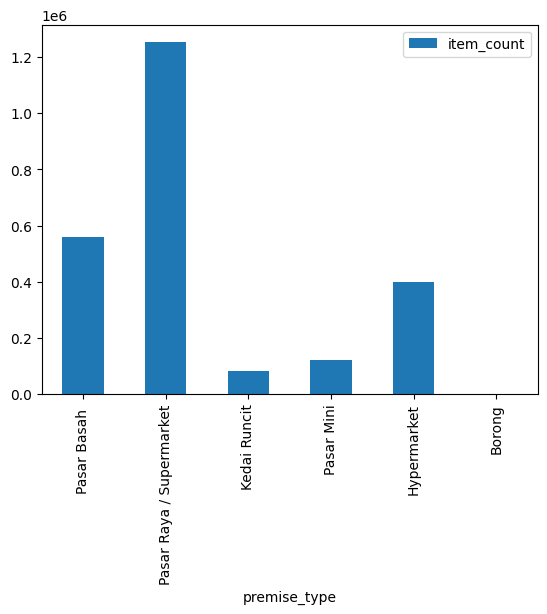

In [202]:
premise_data = item_count('premise_type',list_premise_type)    

District based item count

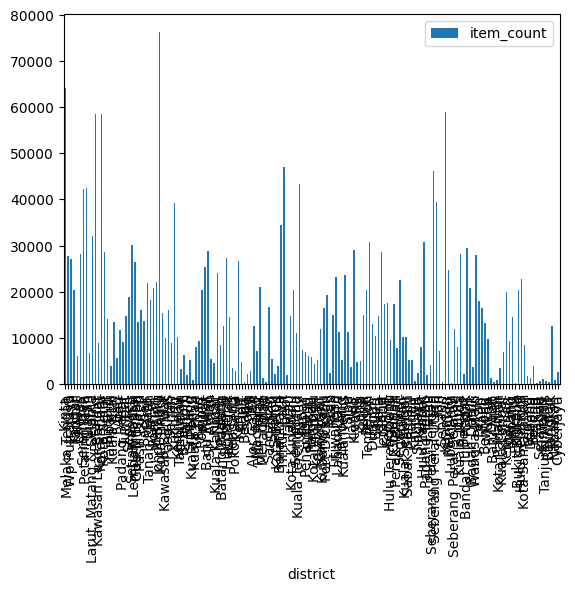

In [203]:
district_data = item_count('district',list_districts)

State based item count

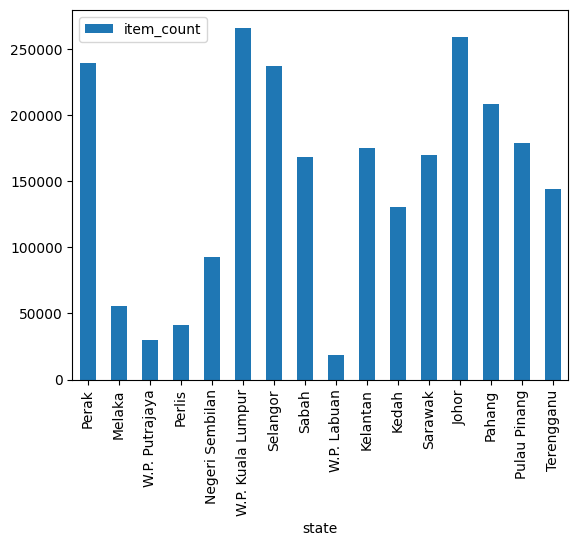

In [205]:
state_data = item_count('state',list_states)

Item type based item count

In [211]:
item_data = item_count('item',list_item_code)

KeyboardInterrupt: 